<H2>Late Delivery and Fraud Detection for e-commerce Supply Chain

Customer satisfaction is the bread and butter of ecommerce businesses. It is the repeat business that is most beneficial to e-commerce businesses and leads to maximum profit since there are no new acquisition costs involved in repeat business.
Thus, prevention of customer churn, which is directly linked to customer satisfaction, is a key driver of a supply chain company's profitability.


Our target business, the DataCo company, is an ecommerce supply chain business, where customer segmentation analysis was performed in this project which helps the company to better understand its customers and target them to increase customer responsiveness and the company's revenue.

The business has two major concerns in its business operations:

1. It is facing high customer churn of unsatisfied customers due to late deliveries
2. It is facing losses due to fraudulent transactions

Some Questions to ask from the Data is:
- Any insights on their business in terms of their product catalog and customer base
- Which customers to target immediately to reduce churn and boost sales
- Do any patterns emerge from their customer base and transactional data that can point to patterns in late deliveries and fraudulent transactions.
- A prediction model that can predict late deliveries sing the order/sale data before they occur.

Detecting late deliveries before they occur can greatly benefit the supply chain business by rerouting and taking proactive steps to ensure on-time delivery.

A prediction algorithms for late deliveries will go a long way towards prevention of customer churn.

The analysis in this notebook is aimed at providing solutions to the above problems and presents the following analysis:

- Exploratory data analysis to detect trends in sales, product pricing and segments, markets and regions, and insights related to late delivery and fraudulent transactions
- Customer segmentation analysis using RFM technique providing a systematic approach to customer loyalty programs.
- A reliable machine Learning model that the company can deploy to detect late deliveries and facilitate customer satisfaction.

Link to repository: <a>https://github.com/sahil095/DS_Group-8_Project</a>

## Data Collection

The dataset used in this project is maintained transparently with the Creative Commons 4.0 license by Fabian Constante, Fernando Silva, and António Pereira through the Mendeley data repository. The dataset consists of roughly 180k transactions from supply chains used by the company DataCo Global for 3 years. The dataset can be downloaded from:

<a> https://data.mendeley.com/datasets/8gx2fvg2k6/5

<strong> Importing all libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar,warnings,itertools
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score
warnings.filterwarnings("ignore")

<h2> Data Wrangling </h2>

In [198]:
# #Importing Dataset using pandas
# df = pd.read_csv(r'https://raw.githubusercontent.com/sahil095/DS_Group-8_Project/main/datasets/Supply%20Chain/DataCoSupplyChainDataset.csv',
#                     header= 0, encoding='unicode_escape')
# df.head(5)

ERROR! Session/line number was not unique in database. History logging moved to new session 68


In [5]:
#Importing Dataset using pandas
df = pd.read_csv(r'D:\UNH Materials\Term 1\Data Science\Dr Sula\DS_Group-8_Project\datasets\Supply Chain\DataCoSupplyChainDataset.csv',
                    header= 0, encoding='unicode_escape')
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


<strong> Data Cleaning

In [200]:
df.shape

(180519, 53)

The total data set consists of 180519 records and 53 columns

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
# Checking for null values
df.apply(lambda x: sum(x.isnull()))

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


We see a few missing values in variables Customer Lname & Customer Zipcode and a large number of missing values in Order Zipcode and Product description. We address this.

We also convert First Name and Last Name into Full Name variable to avoid amiguity and also address missing values of Customer Lname. We also create columns named 'Is Late' and 'Is Fraud' to identify the orders that we delivered late.

In [7]:
# Adding first name and last name together to create new column
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

# Late orders
df['Is_Late'] = np.where(df['Days for shipping (real)'] > df['Days for shipment (scheduled)'], 1, 0)
#dataset['No. of Late'] = np.where(dataset['Days for shipping (real)'] > dataset['Days for shipment (scheduled)'], 
#                                  dataset['Days for shipping (real)'] > dataset['Days for shipment (scheduled)'], 0)

df['Is_Fraud'] = np.where(df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

# Dropping unnecessary columns and ones with large missing values
data = df.drop(columns = ['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
                          'Customer Lname','Latitude','Longitude','Product Description','Product Image',
                          'Order Zipcode','shipping date (DateOrders)'])

# 3 NaNs of Custmer Zipcode replaced with 0. 
data['Customer Zipcode'] = data['Customer Zipcode'].fillna(0)

data.shape

(180519, 44)

Let us find and remove duplicate columns

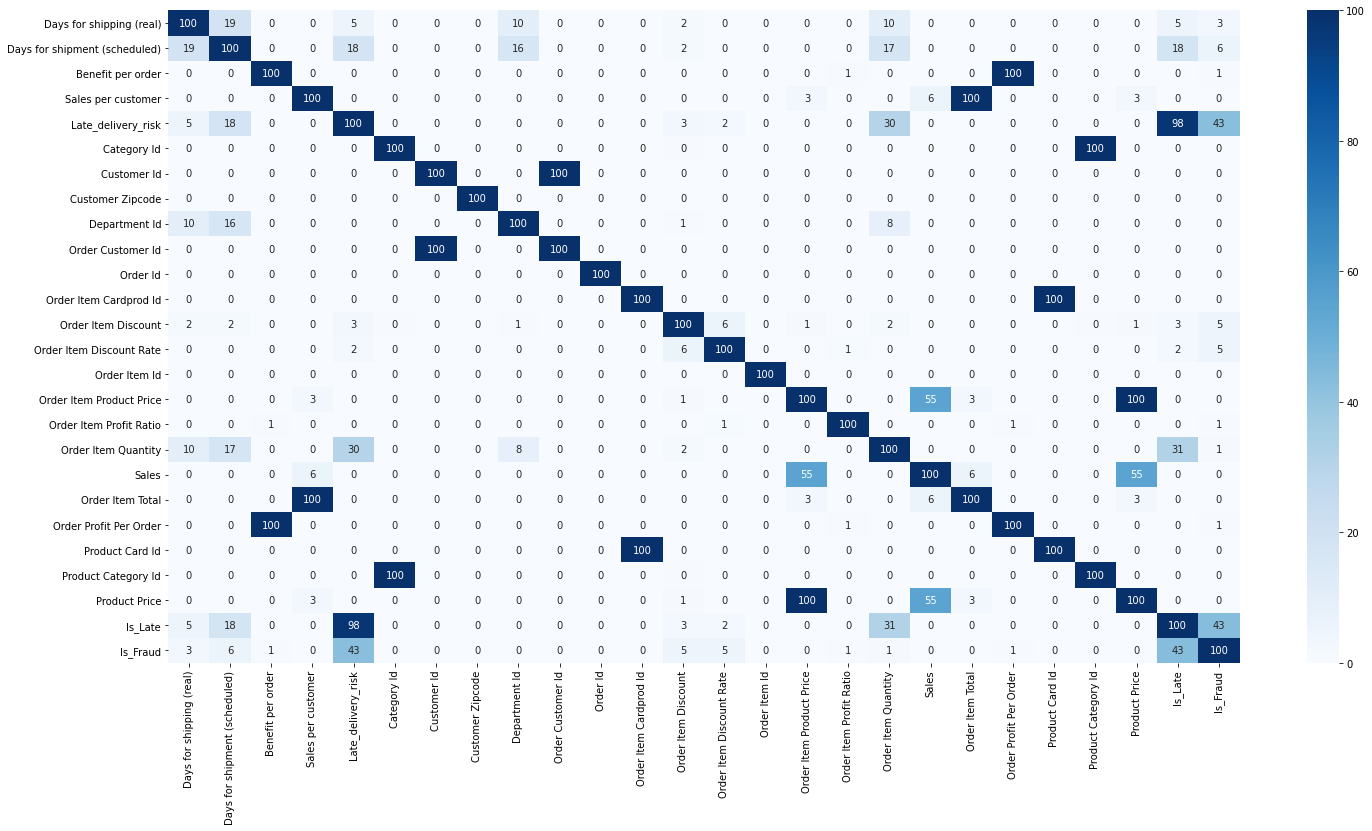

In [8]:
# Comparison function for columns. Returns dataframe with percentage of values that differ
def remove_duplicate_cols(df):
    df_num = df.select_dtypes(include='number')
    dup_df = pd.DataFrame(columns=df_num.columns)
    for col_row in df_num.columns:
        for col_col in df_num.columns:
            dup_df.loc[col_row, col_col] = (df_num[col_row] == df_num[col_col]).sum() * 100 / len(df_num)
    dup_df = dup_df.astype('float')
    return dup_df

# Plot heatmap with duplicate percentages and remove columns with 100
cleanded_data = remove_duplicate_cols(data)
plt.figure(figsize=(24,12))
sns.heatmap(cleanded_data, annot=True, fmt='.0f', cmap='Blues', edgecolors='black')
plt.show()

In [9]:
# Drop duplicate columns from above heatmap
data = data.drop(columns=['Order Profit Per Order', 'Product Category Id', 'Order Customer Id', 
                          'Order Item Cardprod Id', 'Order Item Product Price', 'Sales per customer'])

In [244]:
data.shape

(180519, 44)

<h2> Data Visualization </h2>


Lets look at the correlation characteristics between the numerical variables

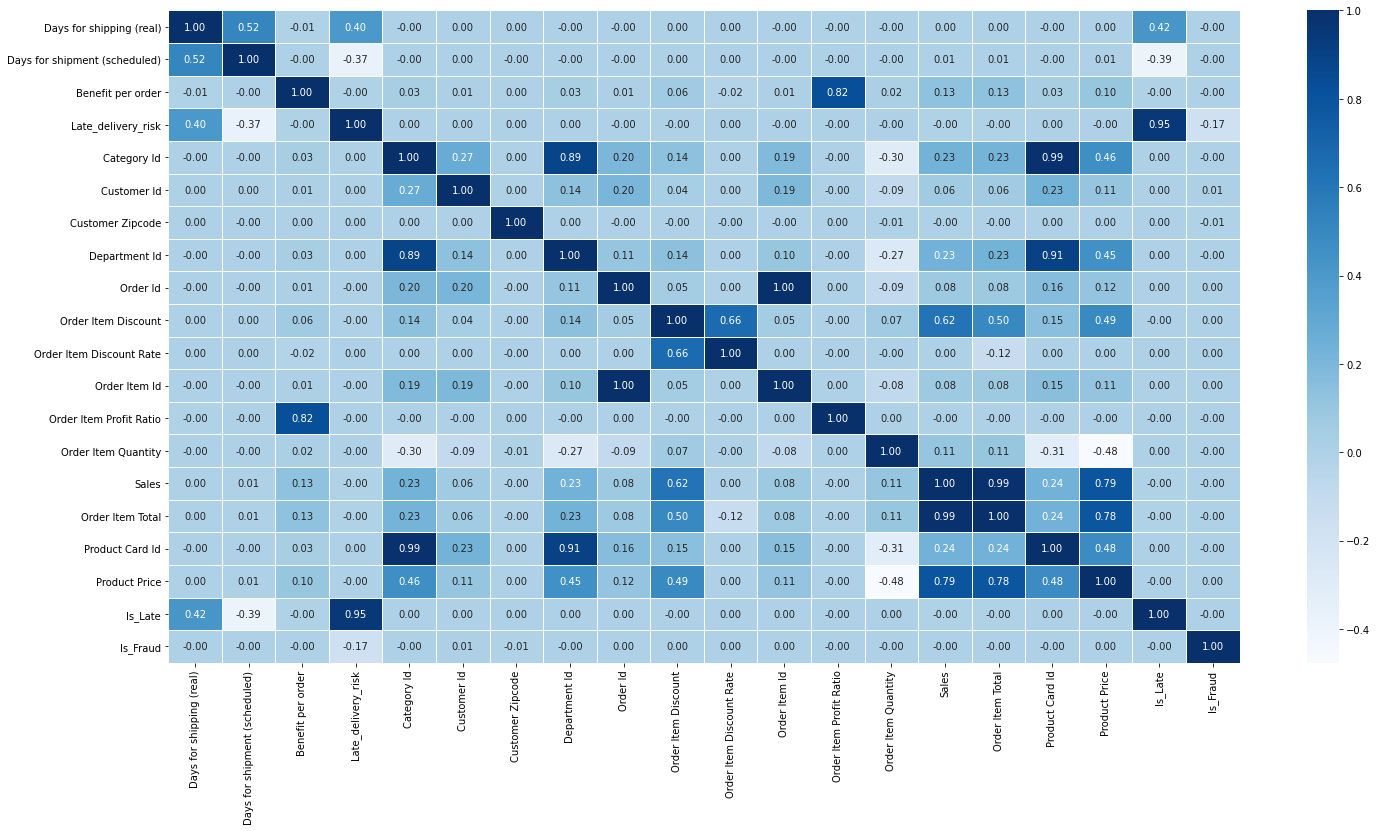

In [305]:
fig, ax = plt.subplots(figsize=(24,12))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
plt.show()

We can observe that product price price has high correlation with Sales,Order Item Total.


The features we are interested in are:

1. Days for shipping (real)
2. Is Late
3. Sales
4. Benefit per order
5. Order Status - This feature tells us about the fraudulent transactions

As the data which is being used for analysis is related to Supply chain, it makes sense to find which region has most sales?

<strong> Sales by Region

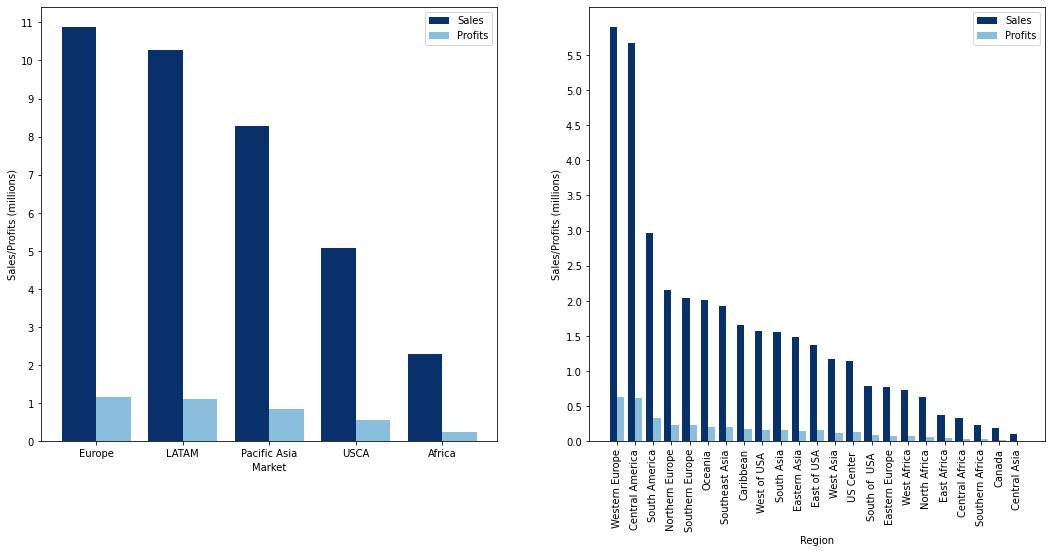

In [306]:
# Data grouping

market = data.groupby(['Market'])
region = data.groupby(['Order Region'])

# Sales and profit by Market
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
markets = market['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(markets))
bar_width = 0.4
ax1.bar(ticks, market['Sales'].sum().reindex(markets), width = bar_width, label = 'Sales', color = '#08306b')
ax1.bar(ticks + bar_width, market['Benefit per order'].sum().reindex(markets), width = bar_width, label = 'Profits', 
        color = '#89bedc')
ax1.set(label = 'Sale and Profit by Market', xlabel = 'Market', ylabel = 'Sales/Profits (millions)', 
        xticks = ticks + bar_width / 2, xticklabels = markets, yticks = np.arange(0, 12e6, 1e6), 
        yticklabels = np.arange(0, 12, 1))
ax1.legend()

# Sales and profit by Region
regions = region['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(regions))
bar_width = 0.4
ax2.bar(ticks, region['Sales'].sum().reindex(regions), width = bar_width, label = 'Sales', color = '#08306b')
ax2.bar(ticks + bar_width, region['Benefit per order'].sum().reindex(regions), width = bar_width, label = 'Profits',
       color = '#89bedc')
ax2.set(label = 'Sale and Profit by Market', xlabel = 'Region', ylabel = 'Sales/Profits (millions)', 
        xticks = ticks + bar_width / 2, xticklabels = regions, yticks = np.arange(0, 6e6, 0.5e6), 
        yticklabels = np.arange(0, 6, 0.5))
ax2.set_xticklabels(regions, rotation = 90)
ax2.legend()
plt.show()

It can be seen from the graph that European market has the most number of sales followed by Latin America whereas Africa has the least. In these markets western europe regions and central america recorded highest sales.
<br><br>

<strong>Sales by Product Category:</strong><br>
Next we take a look at which catergory of products has highest sales?

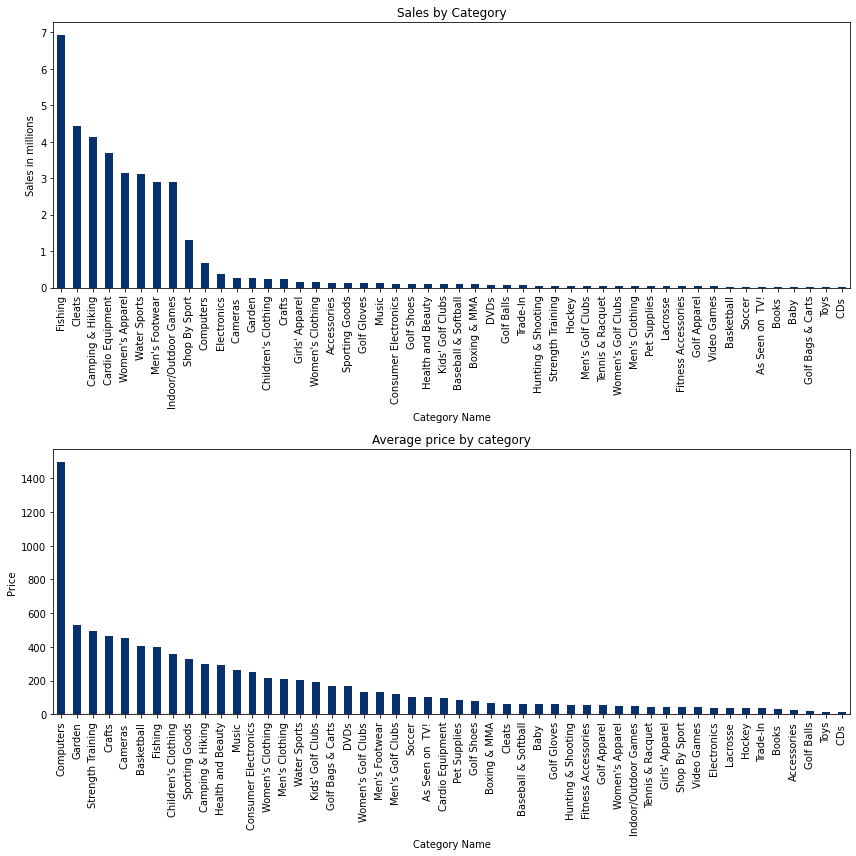

In [307]:
category = data.groupby('Category Name')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
# plt.figure(1)
# Total Sales for all categories
ax1.set(title = "Sales by Category", ylabel = 'Sales in millions', 
        yticks = np.arange(0, 8e6, 1e6), yticklabels = np.arange(0, 8, 1))
category['Sales'].sum().sort_values(ascending = False).plot.bar(ax = ax1, color = '#08306b')

# Average prices for all categories
ax2.set(title = "Average price by category", ylabel = 'Price')
category['Product Price'].mean().sort_values(ascending = False).plot.bar(ax = ax2, color = '#08306b')
plt.tight_layout()
plt.show()

As we can see from the above figure, Fishing category had most number of sales followed by the Cleats.
However it is suprising to see that top 7 products with highest price on average are the most sold products on average with computers having almost 1350 sales despite price being 1500$.
<br><br>

<strong>Sales vs Product Price</strong>

We observed a strong correlation (0.79) between Sales per product (Sales) and Price of the product (Price) in the correlation heatmap.

Lets look at that correlation.

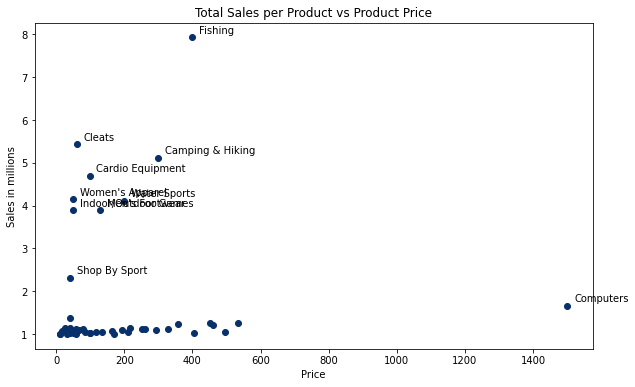

In [308]:
# Sales vs product price scatter plot to see correlation
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(category['Product Price'].mean(), category['Sales'].sum(), color = '#08306b')
top_10 = list(category['Sales'].sum().sort_values(ascending = False)[:10].index)
for item in top_10:
    ax.annotate(item, (category['Product Price'].mean()[item] + 20, category['Sales'].sum()[item] + 100000))
ax.set(title = 'Total Sales per Product vs Product Price', ylabel = 'Sales in millions', xlabel = 'Price', 
       yticklabels = np.arange(0, 9, 1))
plt.show()

We can observe some overlap between the top products in terms of total sales and average price.
Although the top selling products seem to be driven by consumer demand than anything else and no causation exists between the product price and product sales.

We can say that demand is the primary factor driving the sales of a product category.

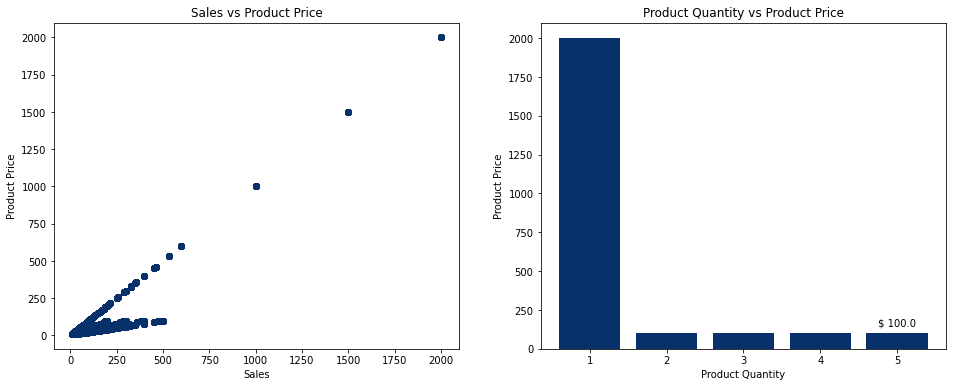

In [309]:
#Quantity bought per product sale.
qty = (data['Sales'] / data['Product Price']).round()  

# Maximum Price of the item sold for that quantity
max_price_per_qty = [data[qty == n]['Product Price'].max() for n in qty.unique()]  

fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].scatter(x = data['Sales'], y = data['Product Price'], color = '#08306b')
ax[0].set(title = 'Sales vs Product Price', xlabel = 'Sales', ylabel = 'Product Price')
ax[1].bar(qty.unique(), max_price_per_qty, color = '#08306b')
ax[1].set(title = 'Product Quantity vs Product Price', xlabel = 'Product Quantity', ylabel = 'Product Price')
ax[1].annotate('$ ' + str(data[qty != 1]['Product Price'].max()), (4.75, data[qty != 1]['Product Price'].max() + 50))
plt.show()

It can be observed that prices has linear relation with sales.

Considering the nature of the dataset, the transaction of each item in a sale is recorded as a seperate entry. We can observe something interesting about the buying pattern of the customers looking at the average sale, product price and the average quantities purchased by product. From the second figure we can see that customers bought larger quantities (>1) of items which are within the 100$ price brand. Hence we see that the slope of the scatter plot is steeper in that region.
This is an interesting insight in terms of consumer behaviour and can be used to pivot or boost sales on the platform.


<strong>Time Series Analysis</strong>

<strong>Sales and Profits vs Time Periods:</strong><br>
Lets find time trends for Sales and identify the busiest periods for sales.<br>
We split the 'order date' into year, month, day and hour and add these columns to our database for groupby operations

In [10]:
date_index = pd.to_datetime(data['order date (DateOrders)'].tolist(), infer_datetime_format=True)
data['order date (DateOrders)'] = date_index
data['order_year']= date_index.year
data['order_month'] = date_index.month
data['order_week_day'] = date_index.weekday
data['order_week'] = date_index.week
data['order_hour'] = date_index.hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

<AxesSubplot:title={'center':'Sales by Time Period'}, xlabel='Time Period'>

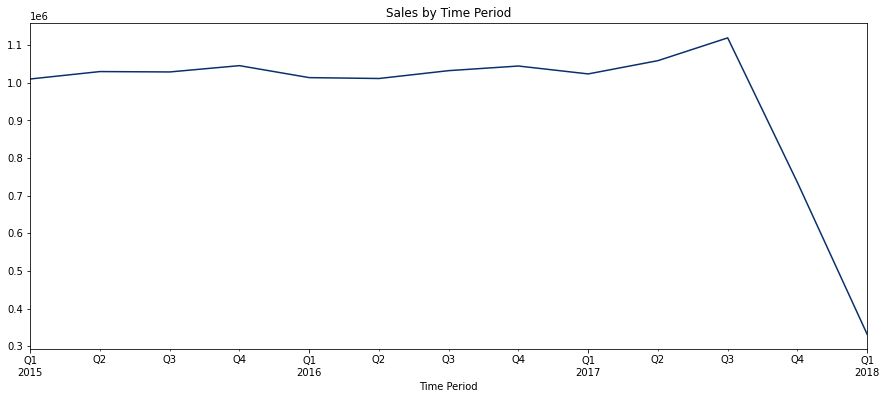

In [26]:
quater= data.groupby('order_month_year')
quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6), title = 'Sales by Time Period', 
                                                xlabel='Time Period', color = '#08306b')

We observe from the above graph that sales were consistent from Q1 2015 until Q3 of 2017 but suddenly dipped in Q4 2017 and Q1 2018.
Its worth examining what caused this dip.

Lets look at the purchase trend in week days, hours and months.

In [312]:
# Calculating the numbers.
# Total Sales & Profit per year
total_sale_year = data.groupby('order_year').sum()['Sales']
total_profit_year = data.groupby('order_year').sum()['Benefit per order']

# Total Sales & Profit in a month averaged over year
avg_sale_month = data.groupby(['order_month', 'order_year']).sum().groupby(level = 0).mean()['Sales']
avg_profit_month = data.groupby(['order_month', 'order_year']).sum().groupby(level = 0).mean()['Benefit per order']

# Total Sales & Profit in a week averaged over year
avg_sale_week = data.groupby(['order_week', 'order_year']).sum().groupby(level = 0).mean()['Sales']
avg_profit_week = data.groupby(['order_week', 'order_year']).sum().groupby(level = 0).mean()['Benefit per order']

# Total Sales & Profit on a day of the week average by week
avg_sale_weekday = data.groupby(['order_week_day', 'order_week']).sum().groupby(level = 0).mean()['Sales']
avg_profit_weekday = data.groupby(['order_week_day', 'order_week']).sum().groupby(level = 0).mean()['Benefit per order']

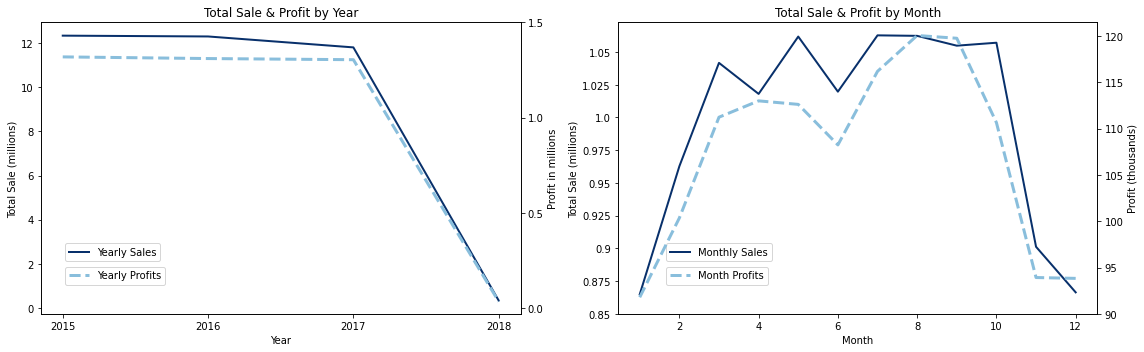

In [313]:
# Ploting yearly and monthly figures
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
axa = ax[0].twinx()
total_sale_year.plot(c = '#08306b', lw = 2, alpha = 1, ax = ax[0])
total_profit_year.plot(c = '#89bedc', ls = '--', lw = 3, alpha = 1, ax = axa)
ax[0].set(title = 'Total Sale & Profit by Year', xlabel = 'Year', ylabel = 'Total Sale (millions)', 
          xticks = total_sale_year.index, xticklabels = total_sale_year.index, yticks = np.arange(0, 1.4e7, 0.2e7),
          yticklabels = np.arange(0, 14, 2))
axa.set(ylabel = 'Profit in millions', yticks = np.arange(0, 2e6, 0.5e6), yticklabels = np.arange(0, 2, 0.5))
ax[0].legend(['Yearly Sales'], loc = (0.05, 0.18))
axa.legend(['Yearly Profits'], loc = (0.05, 0.1) )

axb = ax[1].twinx()
avg_sale_month.plot(c = '#08306b', lw = 2, alpha = 1, ax = ax[1])
avg_profit_month.plot(c = '#89bedc', ls = '--', lw = 3, alpha = 1, ax = axb)
ax[1].set(title = 'Total Sale & Profit by Month', xlabel = 'Month', ylabel = 'Total Sale (millions)',
          yticks = np.arange(8.5e5, 10.75e5, 0.25e5), yticklabels = np.around(np.arange(0.85, 1.075, 0.025), 3))
axb.set(ylabel = 'Profit (thousands)', yticks = np.arange(9.0e4, 12.5e4, 0.5e4), yticklabels = np.arange(90, 125, 5))
ax[1].legend(['Monthly Sales'], loc = (0.1, 0.18))
axb.legend(['Month Profits'], loc = (0.1, 0.1))

plt.tight_layout()
plt.show()

We can see from the plot above that the yearly sale and profit are proportional and the sales and dip to 0 in the 1st quarter of 2018. This could result from hinderance of operations due to reasons such as financial shortages.<br>
From the total monthly sales averaged over the years, we see that maximum sale happens from March till October. The months of January and December have the least sales.<br>
As far as the profits are concerned we see an increment in the 2nd half of the year, typically picking up after June, which is the worst month for profits in between March and October.

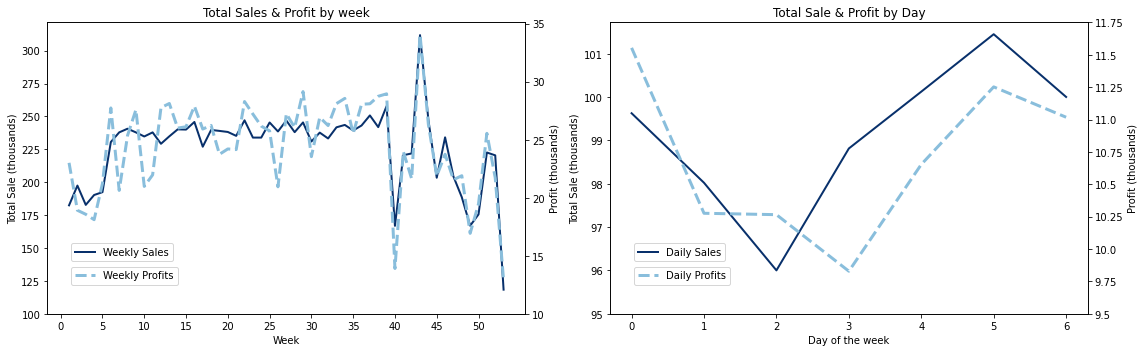

In [314]:
# Plotting weekly and daily numbers
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
axa = ax[0].twinx()
avg_sale_week.plot(c = '#08306b', lw = 2, alpha = 1, ax = ax[0])
avg_profit_week.plot(c = '#89bedc', ls = '--', lw = 3, alpha = 1, ax = axa)
ax[0].set(title = 'Total Sales & Profit by week', xlabel = 'Week', ylabel = 'Total Sale (thousands)', 
          xticks = np.arange(0, 53, 5), xticklabels = np.arange(0, 53, 5), yticks = np.arange(1.0e5, 3.25e5, 0.25e5),
         yticklabels = np.arange(100, 325, 25))
axa.set(ylabel = 'Profit (thousands)', yticks = np.arange(1.0e4, 4.0e4, 0.5e4), yticklabels = np.arange(10, 40, 5))
ax[0].legend(['Weekly Sales'], loc = (0.05, 0.18))
axa.legend(['Weekly Profits'], loc = (0.05, 0.1) )

axb = ax[1].twinx()
avg_sale_weekday.plot(c = '#08306b', lw = 2, alpha = 1, ax = ax[1])
avg_profit_weekday.plot(c = '#89bedc', ls = '--', lw = 3, alpha = 1, ax = axb)
ax[1].set(title = 'Total Sale & Profit by Day', xlabel = 'Day of the week', ylabel = 'Total Sale (thousands)',
          yticks = np.arange(9.5e4, 10.2e4, 0.1e4), yticklabels = np.arange(95, 102, 1))
axb.set(ylabel = 'Profit (thousands)', yticks = np.arange(9.5e3, 12.0e3, 0.25e3), yticklabels = np.arange(9.5, 12, 0.25))
ax[1].legend(['Daily Sales'], loc = (0.05, 0.18))
axb.legend(['Daily Profits'], loc = (0.05, 0.1))

plt.tight_layout()
plt.show()

Looking at the weekly sales, it reflects what we have gathered from the monthly sales i.e. the sales dip during the start and end of the year. We see consistent sales till week 39 after which we see large fluctuations from week 40 to 51. This is most probably reflective of the consumer behaviour in and around the festive weeks during the last few months of the year.

The daily Sales show clearly that weekends have the highest sales and profits. Tuesday has the lowest sale and wednesday has the lowest profits. This could be due to discounts offered.

<strong>Analysis of Payment Methods</strong>

It is also important to know what type of payment methods are being preferred by consumers for purchase of these products. We look at these payment methods distributed over geographical regions

In [236]:
# Types of payment methods
print(data['Type'].unique())

['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']


It is found that four types of payment methods are used.Which payment method is preferred the most by people in different regions?

In [315]:
# Plotting number of transactions for each payment method for different regions
# Total Sale by region for each transaction type --
s_transfer = data[(data['Type'] == 'TRANSFER')].groupby('Order Region').sum()['Sales'].reindex(regions)
s_cash = data[(data['Type'] == 'CASH')].groupby('Order Region').sum()['Sales'].reindex(regions)
s_payment = data[(data['Type'] == 'PAYMENT')].groupby('Order Region').sum()['Sales'].reindex(regions)
s_debit = data[(data['Type'] == 'DEBIT')].groupby('Order Region').sum()['Sales'].reindex(regions)

# No. of transactions by region for each transaction type -- 
n_transfer = data[(data['Type'] == 'TRANSFER')]['Order Region'].value_counts()
n_cash = data[(data['Type'] == 'CASH')]['Order Region'].value_counts()
n_payment = data[(data['Type'] == 'PAYMENT')]['Order Region'].value_counts()
n_debit = data[(data['Type'] == 'DEBIT')]['Order Region'].value_counts()

regions = data['Order Region'].value_counts().index
index = np.arange(len(regions))
bar_width=0.2
opacity=1

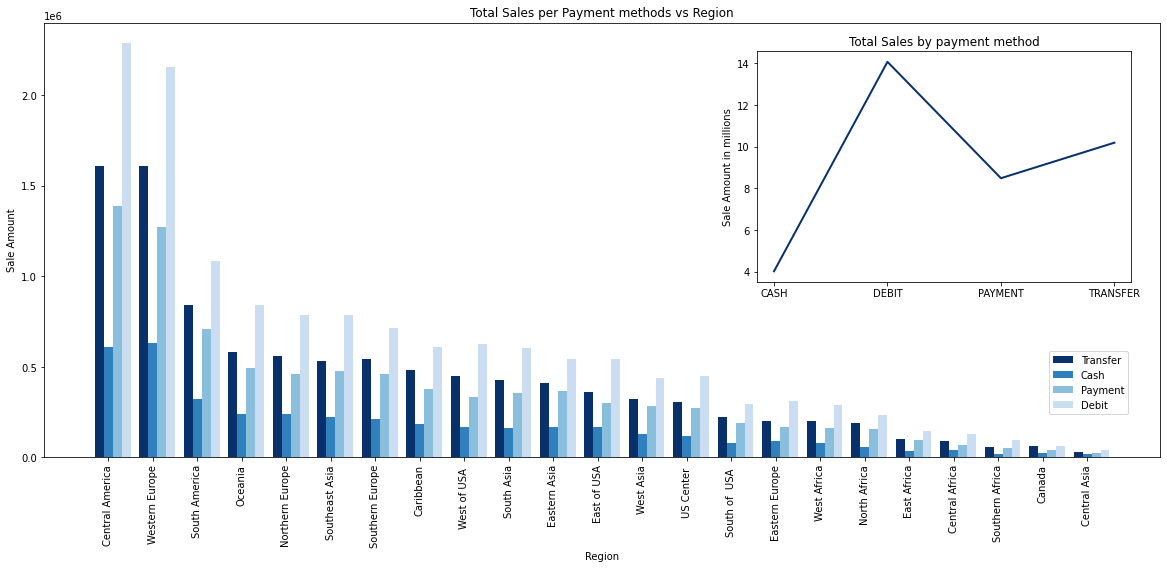

In [316]:
# Plotting total sales by transaction type, by region
fig1,ax1 = plt.subplots(figsize = (20,8))
ax1.bar(index, s_transfer, bar_width, alpha = opacity, color = '#08306b', label = 'Transfer')
ax1.bar(index + bar_width, s_cash, bar_width, alpha = opacity, color = '#3080bd', label = 'Cash')
ax1.bar(index + 2 * bar_width, s_payment, bar_width, alpha = opacity, color = '#89bedc', label = 'Payment')
ax1.bar(index + 3 * bar_width, s_debit, bar_width, alpha = opacity, color = '#cbdef1', label = 'Debit')
ax1.set(title = 'Total Sales per Payment methods vs Region', xlabel = 'Region', ylabel = 'Sale Amount',
      xticks = index + bar_width)
ax1.set_xticklabels(regions, rotation = 90)

# Total Sales by transaction type
ax2 = fig1.add_axes([0.62, 0.43, 0.26, 0.4])
ax2.plot(data.groupby('Type').sum()['Sales'], color = '#08306b', linewidth = 2)
ax2.set(title = 'Total Sales by payment method', ylabel = 'Sale Amount in millions', yticklabels = np.arange(2, 16, 2))
ax1.legend(loc = (0.9, 0.1))
plt.show()

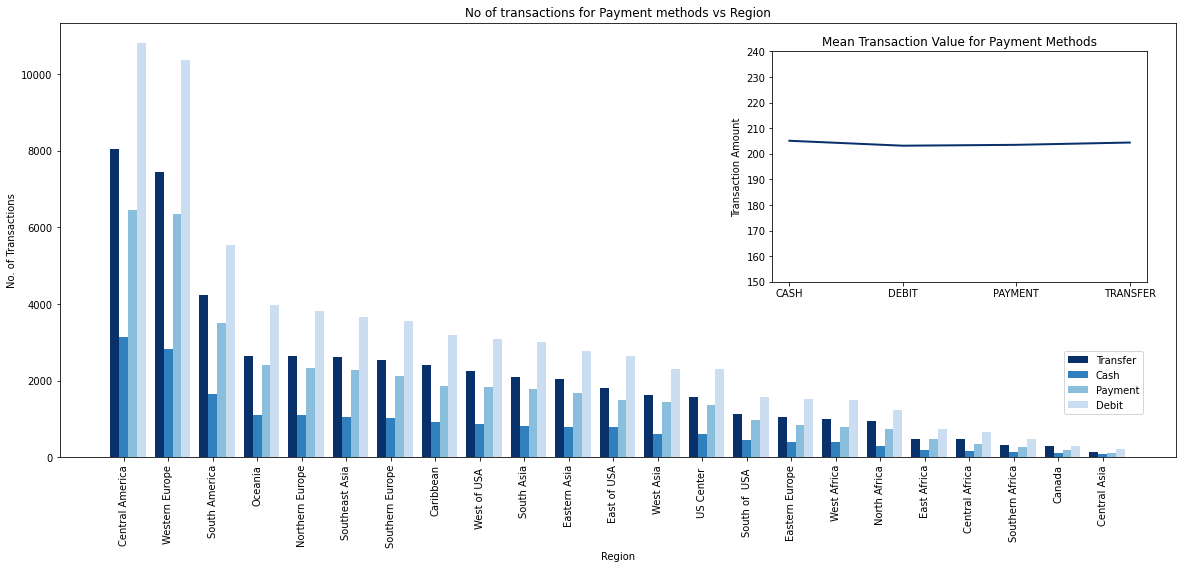

In [317]:
# Plotting Number of transactions by transaction type by region
fig3,ax3 = plt.subplots(figsize = (20,8))
ax3.bar(index, n_transfer, bar_width, alpha = opacity, color = '#08306b', label = 'Transfer')
ax3.bar(index + bar_width, n_cash, bar_width, alpha = opacity, color = '#3080bd', label = 'Cash')
ax3.bar(index + 2 * bar_width, n_payment, bar_width, alpha = opacity, color = '#89bedc', label = 'Payment')
ax3.bar(index + 3 * bar_width, n_debit, bar_width, alpha = opacity, color = '#cbdef1', label = 'Debit')
ax3.set(title = 'No of transactions for Payment methods vs Region', xlabel = 'Region', ylabel = 'No. of Transactions',
      xticks = index + bar_width)
ax3.set_xticklabels(regions, rotation = 90)

# Mean value of transaction by type
ax4 = fig3.add_axes([0.62, 0.43, 0.26, 0.4])
ax4.plot(data.groupby('Type').mean()['Sales'], color = '#08306b', linewidth = 2)
ax4.set(title = 'Mean Transaction Value for Payment Methods', ylabel = 'Transaction Amount', 
        yticks = np.arange(150, 250, 10), yticklabels = np.arange(150, 250, 10))
ax3.legend(loc = (0.9, 0.1))
plt.show()

Debit type is most preferred payment method by people throughout all regions, Cash payment being the least preferred method.<br>
This is reflected in both the number of transactions and the transaction amount.<br>
We also observe that the mean amount for each transaction type is nearly the same (~ 205$)

<strong>Fradulent Transactions EDA</strong>

Some products are having negative benefit per orders which indicates that the orders are generating loss of revenue to the company. Which products are these?

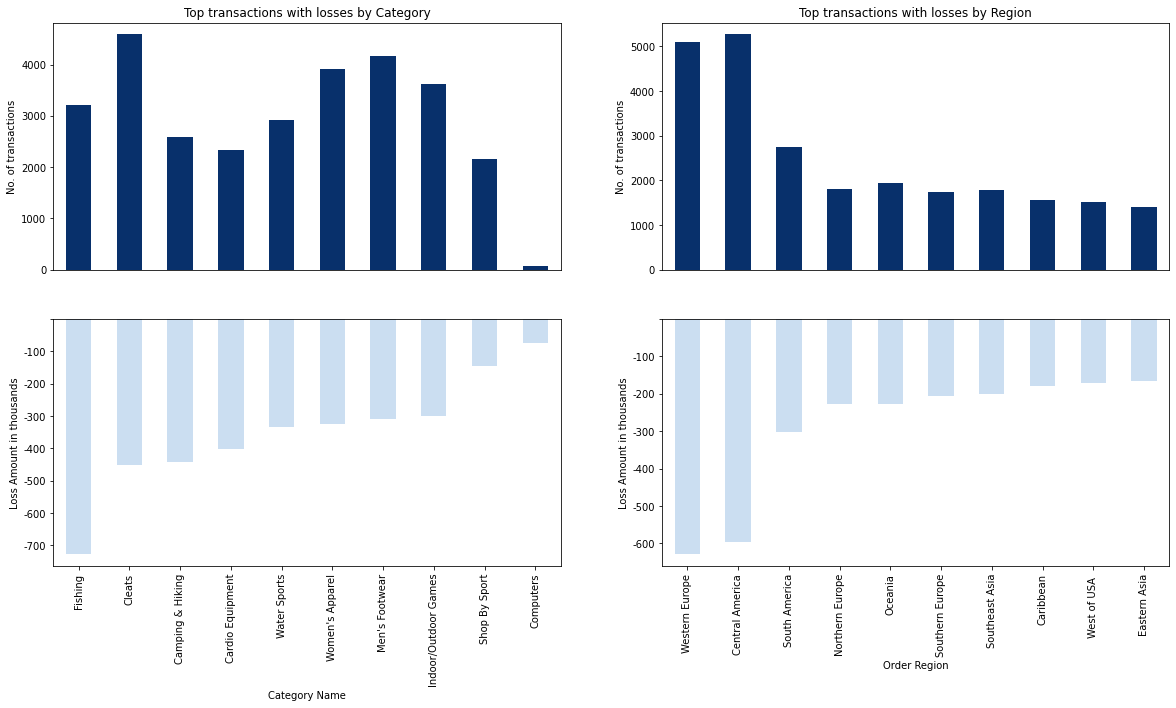

Total losses recorded: -3883547


In [318]:
loss = data[data['Benefit per order'] < 0]

#Plotting top 10 products with most loss
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
axs = axs.flat
max_loss_cat = loss.groupby('Category Name').sum()['Benefit per order'].nsmallest(10)
loss['Category Name'].value_counts()[max_loss_cat.index].plot.bar(ax = axs[0], color = '#08306b')
max_loss_cat.plot.bar(ax = axs[2], color = '#cbdef1')
axs[0].set(title = 'Top transactions with losses by Category', ylabel = 'No. of transactions')
axs[0].xaxis.set_visible(False)
axs[2].set(ylabel = 'Loss Amount in thousands', yticklabels=np.arange(-800, 0, 100))

# Plotting top 10 Regions with max losses
max_loss_reg = loss.groupby('Order Region').sum()['Benefit per order'].nsmallest(10)
loss['Order Region'].value_counts()[max_loss_reg.index].plot.bar(ax = axs[1], color = '#08306b')
max_loss_reg.plot.bar(ax = axs[3], color = '#cbdef1')
axs[1].set(title = 'Top transactions with losses by Region', ylabel = 'No. of transactions')
axs[1].xaxis.set_visible(False)
axs[3].set(ylabel = 'Loss Amount in thousands', yticklabels = np.arange(-700, 0, 100))
plt.show()
print('Total losses recorded: %d' % loss['Benefit per order'].sum())

The total loss sales are approximately 3.9 Millions which is an huge amount.<br>
It can be seen that Cleats is the category with maximum frequency of loss generating transactions followed by Mens footwear.
Fishing records the highest amount lost in loss generating transactions.<br>
Most lost sales are happeing in Western Europe & Central America region. This lost sales may have happened due to suspected frauds or late deliveries.


We explore which payment method has the highest probability of fraudulent transactions.

In [293]:
data[data['Order Status'] == 'SUSPECTED_FRAUD']['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

It can be clearly seen that frauds are only being conducted with TRANSFER Type of Transactions. DEBIT, CASH & PAYMENT methods show no suspected fraudulent transactions.<br>
Are these transactions being conducted from abroad? Which region and what product is being suspected to the fraud the most?

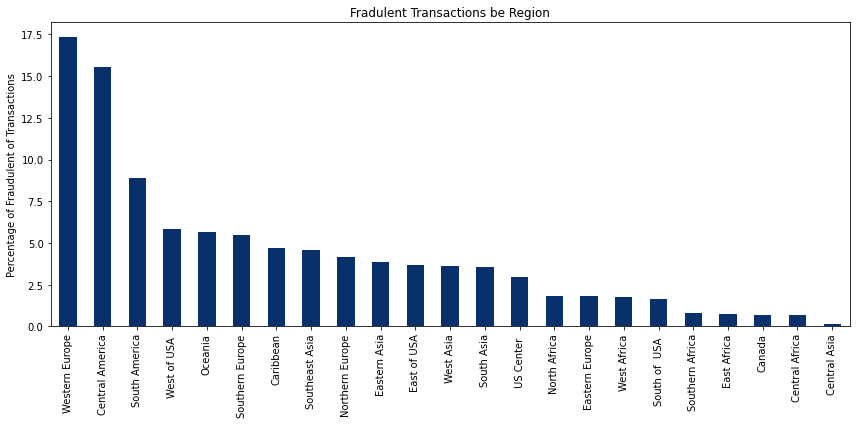

In [295]:
susp_fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']['Order Region'].value_counts()
susp_fraud_pct = susp_fraud * 100 / susp_fraud.sum()

# No of fraudulent transactions by region
susp_fraud_pct.plot.bar(figsize=(12, 6), color = '#08306b')
plt.title('Fradulent Transactions be Region')
plt.ylabel('Percentage of Fraudulent of Transactions')

plt.tight_layout()
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. Which product is being suspected fraud the most?

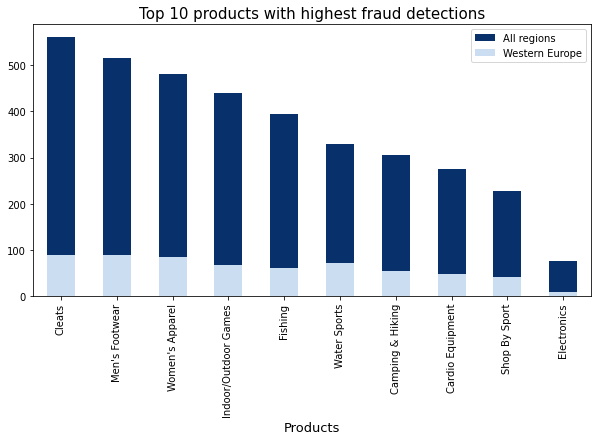

In [296]:
cat_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD')]['Category Name'].value_counts()
WEU_cat_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]\
                     ['Category Name'].value_counts().reindex(cat_fraud.index)

# Bar chart for top 10 most suspected fraud department in all regions
cat_fraud[:10].plot.bar(figsize=(10,5), title="Fraud Category",color='#08306b')

# Bar chart for top 10 most suspected fraud department in Western Europe
WEU_cat_fraud[:10].plot.bar(figsize=(10,5), title="Fraud product in Western Europe",color='#cbdef1')

plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.show()

Cleats department is being suspected of fraud the most followed by Men's footwear in all the regions and also in Western Europe.<br>
Lets look at the consumers who are suspected of fraud.

<h2>Late Delivery Analysis</h2>
The late deliveries are actually being predicted in advance but it seems that either it is not possible to mitigate the risk or the data 'Late_delivery_risk' is being generated post dispatch by gathering delivery information.
Incase it is the earlier and the prediction algorithm does predict late deliveries in advance, there need to be processes set in place such as alternate routing or increased scheduling, that can mitigate the delivery risk and avoid late deliveries.

In [343]:
pct = '%'
print('Accuracy of Risk Detection : %.2f'%((data['Late_delivery_risk'] == data['Is_Late']).sum()*100/len(data)), pct)

Accuracy of Risk Detection : 97.55 %


Lets take a look at how different shipping modes perform in terms of on-time delivery

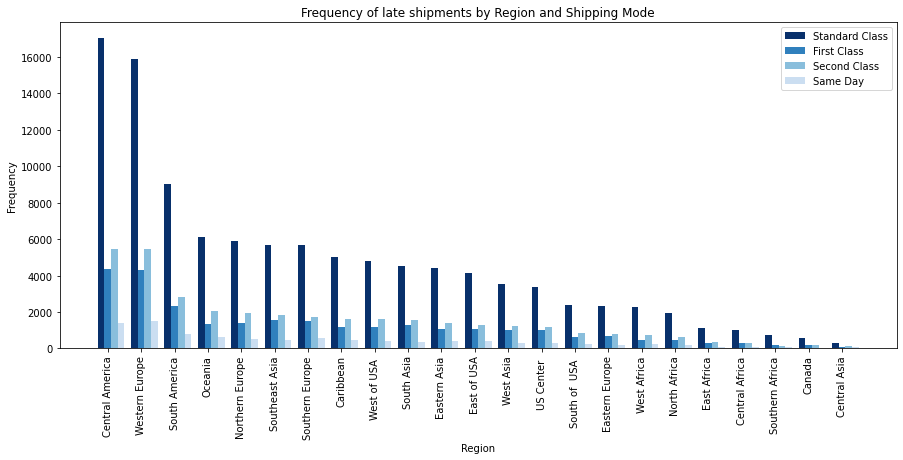

In [346]:
index = data.groupby('Order Region').count()['Sales'].sort_values(ascending=False).index
ticks = np.arange(len(index))

ship_data = data.groupby(['Shipping Mode', 'Order Region']).count()['Sales']
bar_width=0.2
opacity=1

# Plotting late deliveries by Shipping mode and region
fig,ax = plt.subplots(figsize=(15,6))
ax.bar(ticks, ship_data['Standard Class'].reindex(index), bar_width, alpha=opacity, color='#08306b', 
       label='Standard Class')
ax.bar(ticks+bar_width, ship_data['First Class'].reindex(index), bar_width, alpha=opacity, color='#3080bd', 
       label='First Class')
ax.bar(ticks+2*bar_width, ship_data['Second Class'].reindex(index), bar_width, alpha=opacity, color='#89bedc', 
       label='Second Class')
ax.bar(ticks+3*bar_width, ship_data['Same Day'].reindex(index), bar_width, alpha=opacity, color='#cbdef1', 
       label='Same Day')
ax.set(title='Frequency of late shipments by Region and Shipping Mode', xlabel='Region', ylabel='Frequency',
      xticks=ticks+bar_width)
ax.set_xticklabels(index, rotation=90)
ax.legend()
plt.show()

Not a surprise to see the maximum number of late deliveries in the Standard Shipping mode. Followed by Second Class and First Class which are close in terms of late deliveries. The least late deliveries are for Same Day mode. We can see that the costlier the delivery method, the higher the chance of on-time delivery.
As for the regions, Central America has the highest late deliveries followed by Western Europe. Can we blame it on transportation infrastructure? Most probably.

<h2> Customer Segmentation

Customer retention is at the heart of any business and an extremely crucial part of any supply chain business. We cannot imagine bohemoths like amazon.com being in business without great customer retention tactics. In this section we look at ways in which we can identify churn and target certian groups of people for better retention.
Since, purchase history of customers is already avaialble in the dataset, it can use RFM (Recency, Frequency, Monetary) analysis for customer segmention and indentification. We use the RFM technique because utilizes numerical values and the output is easy to interpret

In [325]:
# Last order:
data['order date (DateOrders)'].sort_values(ascending=False)[0]

Timestamp('2018-01-31 22:56:00')

In [326]:
# To calculate recency, we set our present to 1 day after the last order
present = dt.datetime(2018, 2 , 1)
# Total value per transaction - For monetary analysis
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']

# Calculating the R, M and F values into a new dataframe
Customer_seg = data.groupby('Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 
                                                'Order Id': 'count', 'TotalPrice': 'sum'})

Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Rename columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


R_Value(Recency) indicates how much time elapsed since a customer last order.

F_Value(Frequency) indicates how many times a customer ordered.

M_Value(Monetary value) tells us how much a customer has spent purchasing items.

In order to assess our customers based on the R, F and M scores, we combine these scores into a single score numerical figure which can be used to compare our customers.<br>
In order to do that, we first perform quantile binning on the R, F and M scores and get a 'quantile score'. Then aggregate the quantile scores into a single number

In [327]:
# Quantile binning RFM values into scores from 1 to 4
# Higher scores for larger F and M Values
# Lower scores for higher R values

Customer_seg['R_Score'] = pd.qcut(Customer_seg['R_Value'], q=4, labels=[4, 3, 2, 1])

# F score with 3 bins to preserve quantile arrangement
Customer_seg['F_Score'] = pd.qcut(Customer_seg['F_Value'], q=4, labels=[1, 2, 3], duplicates='drop')
Customer_seg['M_Score'] = pd.qcut(Customer_seg['M_Value'], q=4, labels=[1, 2, 3, 4])

print(Customer_seg['R_Score'].value_counts(), '\n', 
      Customer_seg['F_Score'].value_counts(), '\n',
      Customer_seg['M_Score'].value_counts())

4    5206
1    5159
3    5156
2    5131
Name: R_Score, dtype: int64 
 1    10615
2     5386
3     4651
Name: F_Score, dtype: int64 
 1    5182
3    5163
4    5163
2    5144
Name: M_Score, dtype: int64


In [328]:
# Creating aggregate RFM scores
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + \
                            Customer_seg.M_Score.astype(str)
Customer_seg['RFM_Total'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total
Customer Id,,,,,,,,
1,792,1,2362.250061,1,1,2,112,4
2,136,10,2842.700073,3,2,3,323,8
3,229,18,6143.760057,2,3,4,234,9
4,380,14,4370.629991,1,2,3,123,6
5,457,7,2993.790032,1,1,3,113,5


We segment RFM totals into customer categories representing their levels of engagement with the company.

In [330]:
Customer_seg['Customer engagement'] = pd.cut(Customer_seg['RFM_Total'], bins=[0, 4, 5, 6, 7, 8, 10], 
                                             labels=['Lost', 'At Risk', 'Needs Attention', 'Promising', 
                                                     'Loyal Customers', 'Champions'])
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Customer engagement
Customer Id,,,,,,,,,
1,792,1,2362.250061,1,1,2,112,4,Lost
2,136,10,2842.700073,3,2,3,323,8,Loyal Customers
3,229,18,6143.760057,2,3,4,234,9,Champions
4,380,14,4370.629991,1,2,3,123,6,Needs Attention
5,457,7,2993.790032,1,1,3,113,5,At Risk


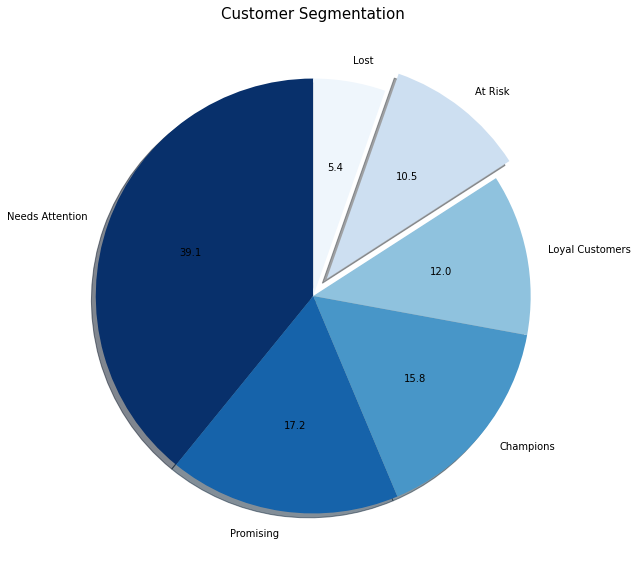

In [341]:
# Calculate average values for each RFM_Level, and return a size of each segment 
colors = ['#08306b', '#1663aa', '#4896c8', '#8fc2de', '#cddff1', '#eff6fc']

Customer_seg['Customer engagement'].value_counts().plot.pie(figsize=(10,10),
                                                            startangle=90, explode=(0,0,0,0,0.1,0),
                                                            autopct='%.1f', shadow=True, 
                                                            colors = colors)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.show()

Based on the RFM segmentation technique, we see that nearly 10.5% of the customers are at risk of churn and nearly 39% need attention to be converted into promising customers. This can be done via promotional offers and discounts.<br>
We see that 5.4% of the customers are already lost.

Lets take a look at out top 10 customers lost due to churn.

In [347]:
churned=Customer_seg[(Customer_seg['R_Score']==1)].sort_values(by='M_Score', ascending=False)[:10]
names = data[data['Customer Id'].isin(churned.index)][['Customer Full Name', 'Customer Id']].drop_duplicates()
churned['Name'] = names.set_index('Customer Id').reindex(churned.index)
churned

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Customer engagement,Name
Customer Id,,,,,,,,,,
12427,450,19,9884.340099,1,3,4,134,8,Loyal Customers,MarySmith
8999,408,22,7669.710029,1,3,4,134,8,Loyal Customers,PaulSmith
3692,351,17,6844.550079,1,3,4,134,8,Loyal Customers,JamesSmith
8953,463,16,6548.320008,1,3,4,134,8,Loyal Customers,EmmaAvila
3682,308,16,6483.410061,1,3,4,134,8,Loyal Customers,EmilyRomero
3680,563,20,8464.689995,1,3,4,134,8,Loyal Customers,DavidSmith
3678,338,26,9289.450132,1,3,4,134,8,Loyal Customers,AliceCastro
3675,528,18,9379.310013,1,3,4,134,8,Loyal Customers,JoycePittman
3671,318,16,7637.550013,1,3,4,134,8,Loyal Customers,MaryJohnson


Top 10 recent customers with highest spending:

In [348]:
#The R_Score should be low and F_Score, M_Score should be as high as possible
new_best=Customer_seg[(Customer_seg['R_Score']==4)].sort_values(by='M_Score', ascending=False)[:10]
names = data[data['Customer Id'].isin(new_best.index)][['Customer Full Name', 'Customer Id']].drop_duplicates()
new_best['Name'] = names.set_index('Customer Id').reindex(new_best.index)
new_best

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Customer engagement,Name
Customer Id,,,,,,,,,,
15552,75,1,505.950012,4,1,2,412,7,Promising,JulieBenton
17960,40,1,353.529999,4,1,2,412,7,Promising,BethanyBright
17962,40,1,267.829987,4,1,2,412,7,Promising,OceanMeadows
17963,40,1,285.679993,4,1,2,412,7,Promising,AlexisPugh
17964,40,1,292.820007,4,1,2,412,7,Promising,ShelleyMcconnell
17965,40,1,296.390015,4,1,2,412,7,Promising,LeslieRatliff
17966,40,1,299.959992,4,1,2,412,7,Promising,QuailByrd
17967,40,1,303.540008,4,1,2,412,7,Promising,ZenaidaCurry
17968,40,1,310.679993,4,1,2,412,7,Promising,WillowCasey


In [ ]:
# # Code to get hex code of any cmap
# from pylab import *

# cmap = cm.get_cmap('Blues')

# for i in range(cmap.N):
#     rgba = cmap(i)
#     if i == 255 or i == 205 or i == 155 or i == 105 or i == 55 or i == 10:
#         print(matplotlib.colors.rgb2hex(rgba))

<h2>Comparison of Classification Models</h2>

<h2>Data Modelling</h2>

There is much modelling and prediction we can do with this data set but since the customer is a supply chain company, we focus on Late delivery detection.
In this section, we will create a classification model for the target variable <b>'Is_Late'</b> in order to generate our prediction models

In [27]:
train_data=data.copy()

We drop the column late_delivery_risk as we have already established that it is accurately predicting late deliveries (~98%).
We also drop Order Status column because, we donot want our machine learning model to pickup on this data and over fit.
Some other repetetive/redundant columns are dropped.

<strong> Feature Engineering

In [28]:
# Dropping columns unnecessary columns and post-dispatch columns

train_data.drop(columns=['Delivery Status','Late_delivery_risk','Order Status', 'order_week',
                         'order_month_year','order date (DateOrders)', 'Days for shipping (real)', 
                         'Customer Full Name'], inplace=True)

In [21]:
train_data.to_csv(r'D:\UNH Materials\Term 1\Data Science\Dr Sula\DS_Group-8_Project\final_data.csv', index=False)

Next we convert the categorical variables to numeric type using the label encoder

In [549]:
train_data.select_dtypes('object').columns

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode'],
      dtype='object')

In [29]:
le = LabelEncoder()
# Columns to encode
to_encode = ['Customer Country', 'Market', 'Type', 'Product Name', 'Customer Segment', 'Customer State', 'Order Region',
            'Order City', 'Category Name', 'Customer City', 'Department Name', 'Order State', 'Shipping Mode', 
            'Order Country']

for col in to_encode:
    train_data[col] = le.fit_transform(train_data[col])

# pd.set_option('display.max_columns', 500)
#display the initial records
train_data.head()

,Type,Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,...,Product Card Id,Product Name,Product Price,Shipping Mode,Is_Late,Is_Fraud,order_year,order_month,order_week_day,order_hour
0,1,4,91.250000,73,40,66,1,20755,0,36,...,1360,78,327.75,3,0,0,2018,1,2,22
1,3,4,-249.089996,73,40,66,1,19492,0,36,...,1360,78,327.75,3,1,0,2018,1,5,12
2,0,4,-247.779999,73,40,452,0,19491,0,5,...,1360,78,327.75,3,0,0,2018,1,5,12
3,1,4,22.860001,73,40,285,0,19490,2,5,...,1360,78,327.75,3,0,0,2018,1,5,11
4,2,4,134.210007,73,40,66,1,19489,1,36,...,1360,78,327.75,3,0,0,2018,1,5,11


Now all the data is transformed into numeric type. We seperate out our predictor vector and our target variable.

In [30]:
# We seperate the predictors from the target
xl = train_data.drop(columns=['Is_Fraud', 'Is_Late'])
y = train_data['Is_Late']

In [552]:
train_data['Is_Late'].sum()/train_data['Is_Late'].shape[0]

0.5727928916069777

The dataset for late deliveries is fairly balanced and we can tackle it through standard classification methods without any requirement of treating any imbalance or adjusting our classification threshold.

<h2> Decision Tree Classifier for Late Deliviery model prediction

In [53]:
#All columns expect late delivery
X=train_data.loc[:, train_data.columns != 'Is_Late']
#Only late delivery column
y=train_data['Is_Late']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [54]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

The data is now ready to be used in machine learning models. We use the performance metric as the f1 score since it is the harmonic mean of precision and recall and will give us a fair estimate of our performance.

We will use Cross Validation as our method of evaluating the model. We create a function to evaluate our models using cross validation.

In [41]:
def classifiermodel(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train,y_train)                                     # Fitting train data for predection of late delivery
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)                              #Accuracy for predection of late delivery
    recall = recall_score(y_pred, y_test)                                  # Recall score for predection of late delivery
    conf = confusion_matrix(y_test, y_pred)                                #predection of late delivery
    f1 = f1_score(y_test, y_pred)                                          #predection of late delivery
    print('Accuracy of late delivery status is:', (accuracy) * 100, '%')
    print('Recall score of late delivery status is:', (recall) * 100, '%')
    print('Conf Matrix of late delivery status is: \n', (conf))
    print('F1 score of late delivery status is:', (f1) * 100, '%')
    return model

In [40]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

In [42]:
dt_model_r = classifiermodel(dt_model, X_train_sc, X_test_sc, y_train, y_test)
rf_model_r = classifiermodel(rf_model, X_train_sc, X_test_sc, y_train, y_test)
xgb_model_r = classifiermodel(xgb_model, X_train_sc, X_test_sc, y_train, y_test)

Accuracy of late delivery status is: 84.6526700642588 %
Recall score of late delivery status is: 86.56090269071271 %
Conf Matrix of late delivery status is: 
 [[12612  2787]
 [ 2754 17951]]
F1 score of late delivery status is: 86.62982892165142 %
Accuracy of late delivery status is: 81.60314646576556 %
Recall score of late delivery status is: 90.73634204275535 %
Conf Matrix of late delivery status is: 
 [[13800  1599]
 [ 5043 15662]]
F1 score of late delivery status is: 82.50539956803455 %
Accuracy of late delivery status is: 73.62619100376689 %
Recall score of late delivery status is: 84.68457291731282 %
Conf Matrix of late delivery status is: 
 [[12930  2469]
 [ 7053 13652]]
F1 score of late delivery status is: 74.14326834301852 %


In [36]:
print(model.tree_.max_depth)
print(model.tree_.node_count)

55
27621


<H3> Hyper Parameter Tuning - Decision Tree

In [43]:
print(dt_model_r.tree_.max_depth)
print(dt_model_r.tree_.node_count)

55
27571


In [ ]:
# Tuning the decision tree
grid = {'max_depth': [10, 20, 30, 50, 70, None], 'min_samples_split': [2, 5, 10, 15]}
search_cv_dt = GridSearchCV(dt_model_r, param_grid=grid, scoring='f1', cv=5, n_jobs=-1)
search_cv_dt.fit(X_train_sc, y_train)

print('Best params for Decision Tree model: ', search_cv_dt.best_params_)
print('Best score for Decision Tree model: ', search_cv_dt.best_score_)

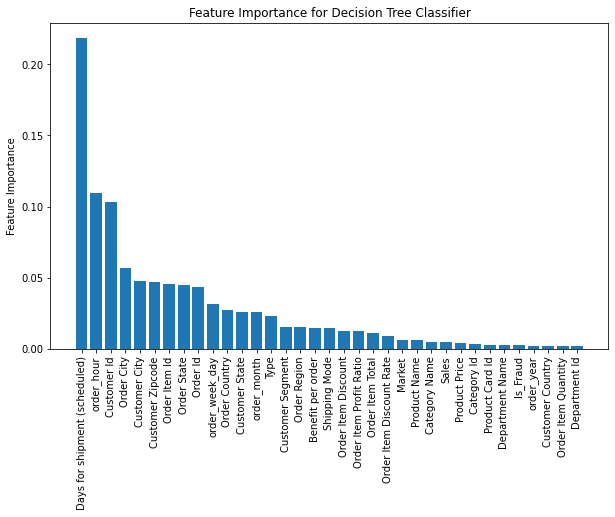

In [73]:
FI_sort = np.argsort(dt_model_r.feature_importances_)[::-1]
feature_importance = dt_model_r.feature_importances_[FI_sort]
xticks = np.arange(len(FI_sort))
xticklabels = X_train.columns[FI_sort]

plt.figure(figsize=(10, 6))
_ = plt.bar(xticks, feature_importance)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Classifier')
plt.show()

As expected (and also seen from our EDA of late deliveries), 'Shipping mode' has the highest contribution to determining which deliveries will be late. 'order_hour' comes in second.
What can we do to improve the delivery performance? :

1. Improve or switch the logistics for increased reliable performance on lower priced shipping modes.
2. Incorporate the order traffic and same day dispatch feasibility (these parameters could be indicative of 'order_hour') into the shipping estimates when orders are placed by customers.

<h3>Hyper Parameter Tuning - Random Forest 

In [ ]:
# Tuning the random forest
rf_model = RandomForestClassifier()
grid = {'n_estimators':[100, 200, 300, 500], 'max_features': [5, 10, 15, 20]}
search_cv_rf = GridSearchCV(rf_model, param_grid=grid , scoring='f1', cv=3, n_jobs=-1)
search_cv_rf.fit(X_train_sc, y_train)

rf_params = search_cv_rf.best_params_
print('Best params for Random Forest model: ', rf_params)
print('Best score for Random Forest model: ', search_cv_rf.best_score_)

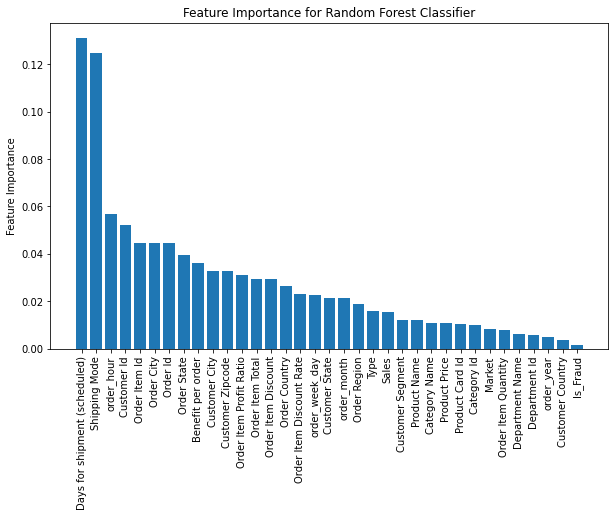

In [72]:
# Feature importances - Randomforest
best_model_rf = search_cv_rf.best_estimator_
FI_sort = np.argsort(rf_model_r.feature_importances_)[::-1]
feature_importance = rf_model_r.feature_importances_[FI_sort]
xticks = np.arange(len(FI_sort))
xticklabels = X_train.columns[FI_sort]

plt.figure(figsize=(10, 6))
_ = plt.bar(xticks, feature_importance)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

<H3>Hyper Parameter Tuning - XGBoost 

In [ ]:
# Initial model & grid for hyperparam tuning
xgb_model = XGBClassifier()
grid = {'n_estimators': [200, 300, 500, 1000], 'learning_rate': [0.05, 0.1, 0.2, 0.3]}
search_cv_xgb = GridSearchCV(xgb_model, param_grid=grid, scoring='f1', cv=3, n_jobs=-1)
search_cv_xgb.fit(X_train_sc, y_train)

xgb_params = search_cv_xgb.best_params_
print('Best params for XGBoost model: ', xgb_params)
print('Best score for XGBoost model: ', search_cv_xgb.best_score_)

In [ ]:
best_model_xgb = search_cv_xgb.best_estimator_
FI_sort = np.argsort(best_model_xgb.feature_importances_)[::-1]
feature_importance = best_model_xgb.feature_importances_[FI_sort]
xticks = np.arange(len(FI_sort))
xticklabels = X_train_sc.columns[FI_sort]

plt.figure(figsize=(10, 6))
_ = plt.bar(xticks, feature_importance)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for XGBoost Classifier')
plt.show()

<strong>Conclusion</strong>
After analyzing the DataCo Company dataset we discovered that the highest sales were derived from the Western Europe and Central America regions. The frequency of late deliveries and fraudulent transaction were also proportionate with the frequency of sales by region, making Western Europe and Central America leaders in these categories too.

<strong>Sales:</strong>
The total sales for the company were consistent and on the uptick until the 2017 Q3 following which the sales suddenly dipped by almost 65% in 2018 Q1. On average, July had the most sales in terms of monetary value while the profits peaked in the month of September.

<strong>Payments:</strong>
Most customers preferred payments through debit cards and all fraud transactions were reported with wire transfer mode of payment. The company needs to set up checks and balanced to avoid these fraudulent transactions as we could see that the company was scammed with more than 100k by a single customer.

<strong>Customer Segmentation:</strong>
The RFM technqiue deployed clearly shows a lack of customer retention techniques with almost 50% of the consumers falling under the 'At Risk' and 'Needs Attention' categories. This segmentation can help guide a comprehensive customer loyalty program which can help reduce the consumer churn significantly.

<strong>Logistics:</strong>
Product categories: Cleats, Men's Footwear, and Women's Apparel lead in late deliveries. The supply chain of these products needs to be better optimized to tackle this. When compared with other classification machine learning models, the DecisionTree model did a good job of identifying orders with later delivery with an f1 score of 78.6%. When we tuned the random forest, it showed a much better prediction accuracy for late deliveries with an F1 score of nearly 80%. We had to limit the extent of hyper parameter tuning due to the computation power requirements. Although these models can be tuned further.
Looking at the feature importances from the tree based models, it is evident that the 'Shipping Mode', 'Days for shipment (scheduled)' and 'order_hour' have the maximum weight in predicting the binary response of our target variable (late or not). This was extremely evident in the XGBoost model where the model chose to assign negligible importances to all other features except the three listed above.
The company can take multiple steps to improve on these three features. Two critical suggestions in this regard would be:

Improve or switch the logistics for increased reliable performance on lower priced shipping modes.
Incorporate the order traffic and same day dispatch feasibility (these parameters could be indicative of 'order_hour') into the shipping estimates when orders are placed by customers. This will improve the feature response with both ‘days for shipment (scheduled)’ as well as ‘order_hour’.